# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

***

Name: **Rohitashwa Chakraborty**

EID: **rc47878**

Name: **Sahitya Sundar Raj Vijayanagar**

EID: **sv25849**

***


# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:
a)  $E[g(x_0)]-f(x_0)$ represents the bias term of the estimator. Here, $g(x_0)$ is the estimator that is used to predict the value for the first data point, based on the model fitted to the data and $E[g(x_0)]$ is the estimated value for that parameter. $f(x_0)$ is the actual value that is generated by the data generator. Hence, $E[g(x_0)]-f(x_0)$ represents the error, or the difference between the actual value and the predicted value for the first data point. This is called **bias**, as it is a representation of how the prediction differs from reality. Higher this value, farther is the prediction from the actual value.



b) **Bias** is a representation of how different the prediction is from the actual value. **Variance**, on the other hand, is the extent to which the prediction is sensitive to the changes in input. As shown in the figure below, for the plot with high bias, low variance, the model is simple, and the fit of the model has been assumed to be linear. In this case, the train and test error are high and with increase in data points, bias remains unchanged. Increasing the features or the polynomial degree would reduce the model bias and reduce the simplicity of the model.<br>
On the other hand, the figure with high variance and low bias is overfitting the model and the curve passes through every single point, making it very complex. In this case, the training error is almost 0 and the test error is very high. Increasing the number of data points would reduce the model error. Reducing the features or regularization would reduce the varinace.<br>
**Bias-Variance Tradeoff** is the way to prevent the model from underfitting(high bias) as well as overfitting(high variance) the data. As bias reduces in an underfit model, the variance increases, and vice versa. The optimal model as shown in the second figure below would result from an intermediate bias and variance, or the bias-variance tradeoff.

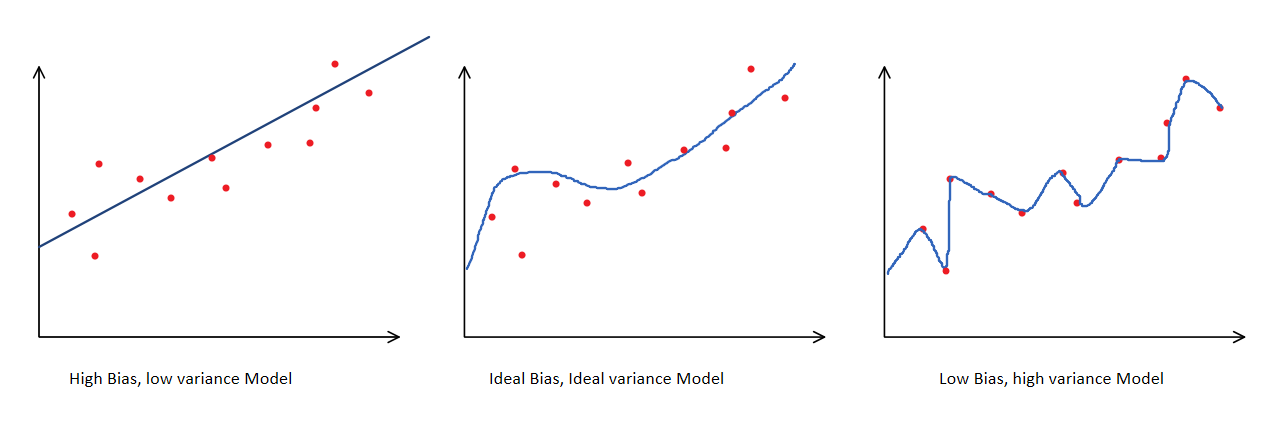

***


# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
# x_all = np.linspace(-10,10,101).reshape(-1,1)
x_all = np.linspace(-5,5,101).reshape(-1,1)

lrp = LinearRegression()

degree = [2,4,7]

In [2]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all),
  # and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE
  fig, ax = plt.subplots(1,2, sharex= False, sharey=False)
  # ax[0].get_shared_x_axes().join(ax[0], ax[1])
  fig.set_size_inches(30, 10,  forward=True)

  ax[0].scatter(x_train, y_train,
                marker = "*", s = 15, c = "orange")
  
  ax[0].scatter(x_test, y_test,
                marker = "*", s = 15, c = "blue")
  
  train_mse = np.array([0.0]*3)
  test_mse = np.array([0.0]*3)
  all_mse = np.array([0.0]*3)
  
  for i in range(len(degree)):
    x_train_mod = np.vander(np.squeeze(x_train),N= degree[i]+1)
    x_test_mod = np.vander(np.squeeze(x_test),N= degree[i]+1)
    x_all_mod = np.vander(np.squeeze(x_all),N= degree[i]+1)

    model = lrp.fit(x_train_mod, y_train)
    y_pred_train = model.predict(x_train_mod)
    y_pred_test = model.predict(x_test_mod)
    y_pred_all = model.predict(x_all_mod)

    train_mse[i] = mean_squared_error(y_true = y_train, y_pred = y_pred_train)
    test_mse[i] = mean_squared_error(y_true = y_test, y_pred = y_pred_test)
    print('\nFor model with Degree:', degree[i])
    print('\n\tTrain MSE: ', train_mse[i])
    print('\n\tTest MSE: ', test_mse[i])

    tmp_x_train, y_pred_train = list(zip(*sorted(list(map(tuple, zip(x_train,y_pred_train))), key = lambda x: x[0])))
    tmp_x_test, y_pred_test = list(zip(*sorted(list(map(tuple, zip(x_test,y_pred_test))), key = lambda x: x[0])))
    tmp_x_all, y_pred_all = list(zip(*sorted(list(map(tuple, zip(x_all,y_pred_all))), key = lambda x: x[0])))

    ax[0].plot(tmp_x_test, y_pred_test)
    # ax[1].set_title("Test Data")
    # ax[1].legend(degree)

    # ax[0].plot(tmp_x_train, y_pred_train)
    ax[0].set_title("Train-Test Datapoints & Test Curves")
    ax[0].legend(["Polynomial Degree {}".format(x) for x in degree]+["Training Data","Test Data"])
    
    ax[1].plot(tmp_x_all, y_pred_all)
    ax[1].set_title("Curves on x_all")
    ax[1].legend(["Polynomial Degree {}".format(x) for x in degree])
    
  plt.show()
  return np.sqrt(train_mse), np.sqrt(test_mse)




For model with Degree: 2

	Train MSE:  247.2967979737153

	Test MSE:  320.06408346977855

For model with Degree: 4

	Train MSE:  31.720018057290062

	Test MSE:  31.292082886606703

For model with Degree: 7

	Train MSE:  30.677193592109735

	Test MSE:  33.41069407769006


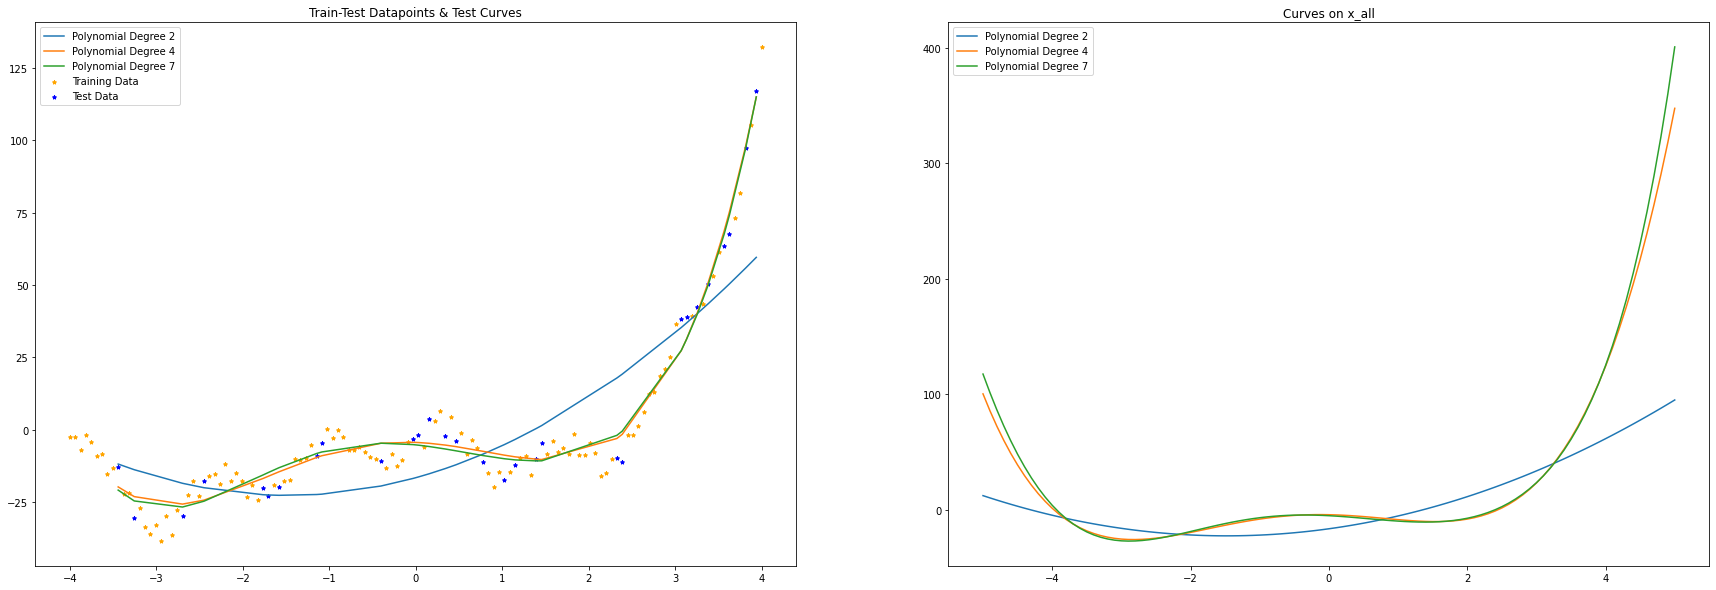

In [3]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

## PartB
The **degree 2** curve represents a model that is simple, having relatively high bias and low variance, changing direction atmost once. However, as shown by the scatter plot of data points, the degree 2 curve is not a good fit and has **underfit** the data. <br>

The **degree 7** curve represents a more complicated model, having high variance and low bias, changing direction atmost 6 times. Based on the curves shown on the plot, it fits the data better than the second degree polynomial. But, this **overfits** the data<br>

The **degree 4** curve has an intermediate bias and variance. As per the graph, this curve is very close to the graoh for degree 7, and can change its direction atmost 3 times, 
creating a more smoother curve than the degree 7 graph.

## PartC


20% data

For model with Degree: 2

	Train MSE:  161.17147378830037

	Test MSE:  402.32312690992865

For model with Degree: 4

	Train MSE:  35.11511313912979

	Test MSE:  38.3407449834427

For model with Degree: 7

	Train MSE:  22.543946691373343

	Test MSE:  135.2076452675697


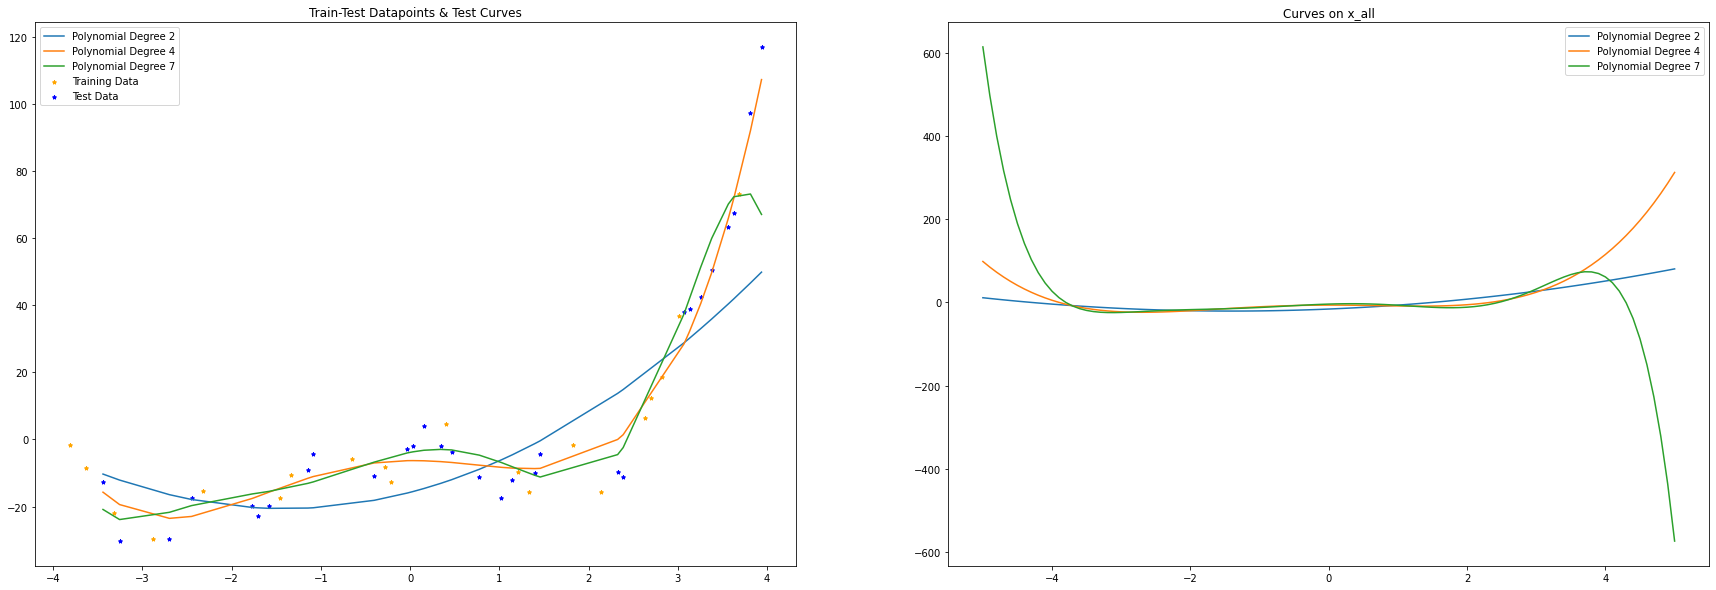

40% data

For model with Degree: 2

	Train MSE:  150.33251286085704

	Test MSE:  405.8051669616576

For model with Degree: 4

	Train MSE:  31.6245296464469

	Test MSE:  33.16428295918744

For model with Degree: 7

	Train MSE:  25.49271875165362

	Test MSE:  61.237418845510675


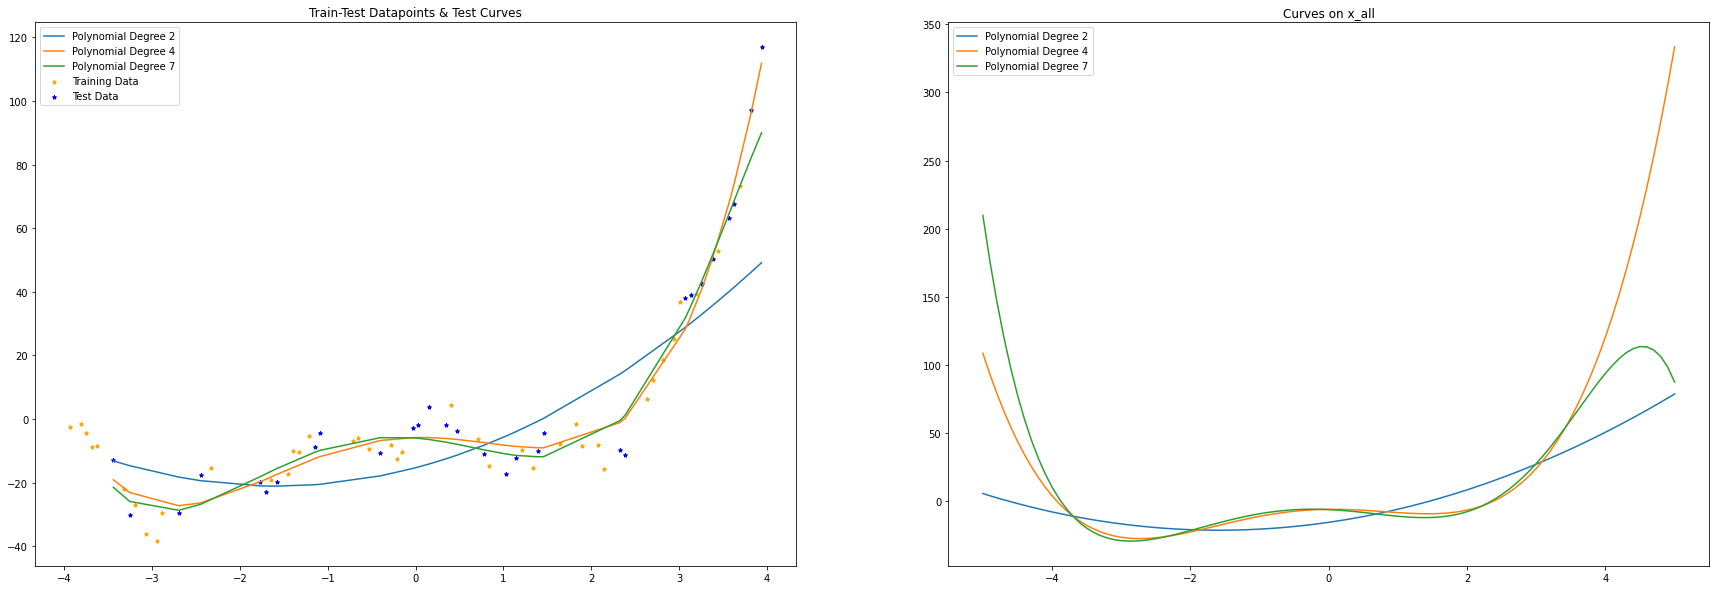

60% data

For model with Degree: 2

	Train MSE:  150.08383759141728

	Test MSE:  403.2513784833407

For model with Degree: 4

	Train MSE:  29.192805739947893

	Test MSE:  31.7814154161967

For model with Degree: 7

	Train MSE:  26.09908864245441

	Test MSE:  60.16667237664501


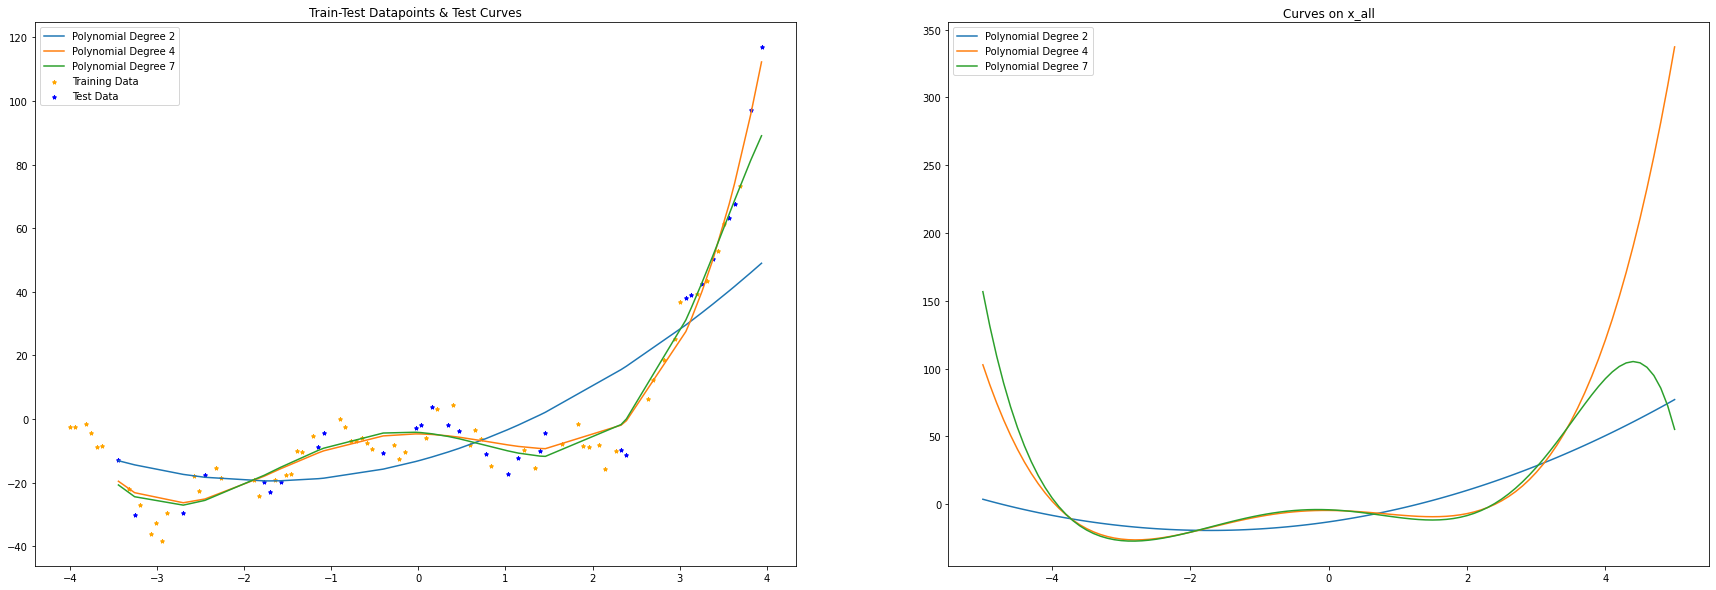

80% data

For model with Degree: 2

	Train MSE:  168.1188246150281

	Test MSE:  407.59369688184694

For model with Degree: 4

	Train MSE:  29.305108483323444

	Test MSE:  32.518106868742606

For model with Degree: 7

	Train MSE:  26.549129596283628

	Test MSE:  48.07693529710756


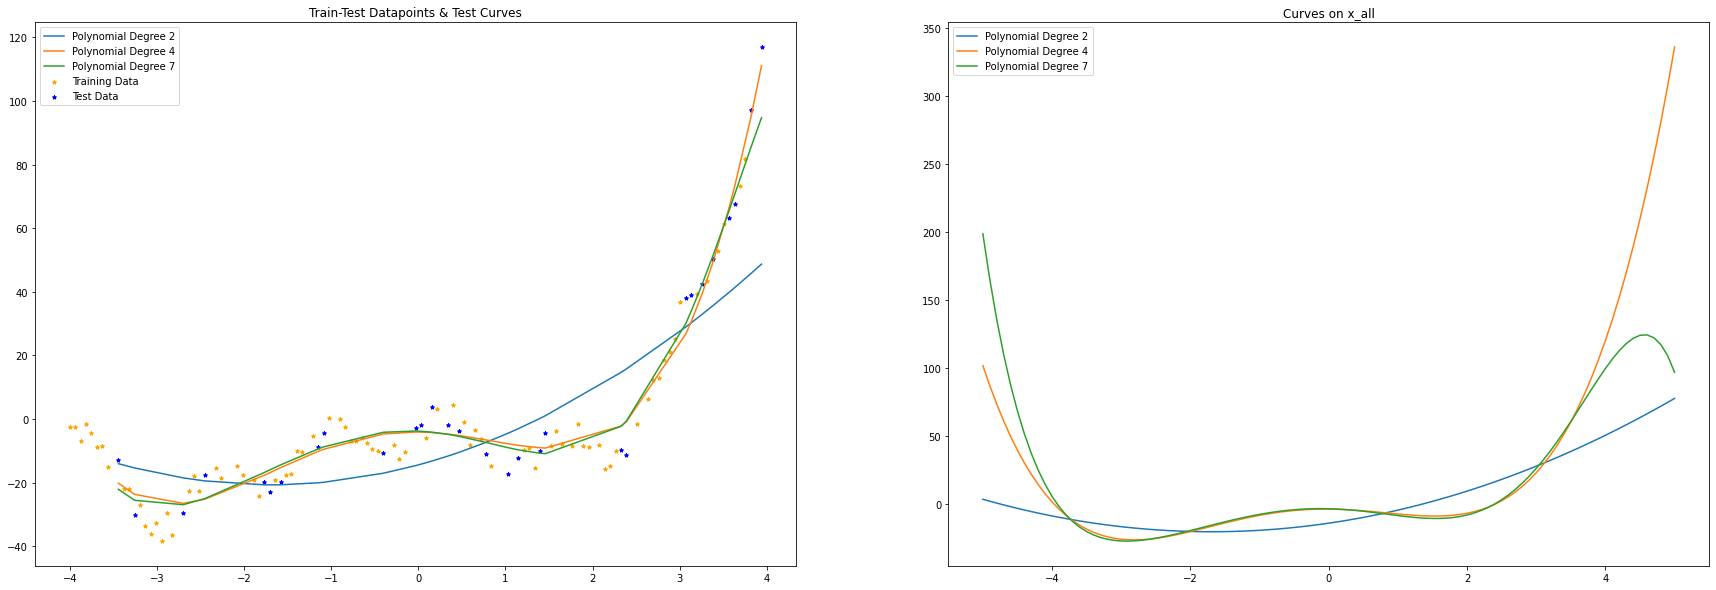

100% data

For model with Degree: 2

	Train MSE:  247.2967979737153

	Test MSE:  320.06408346977855

For model with Degree: 4

	Train MSE:  31.720018057290062

	Test MSE:  31.292082886606703

For model with Degree: 7

	Train MSE:  30.677193592109735

	Test MSE:  33.41069407769006


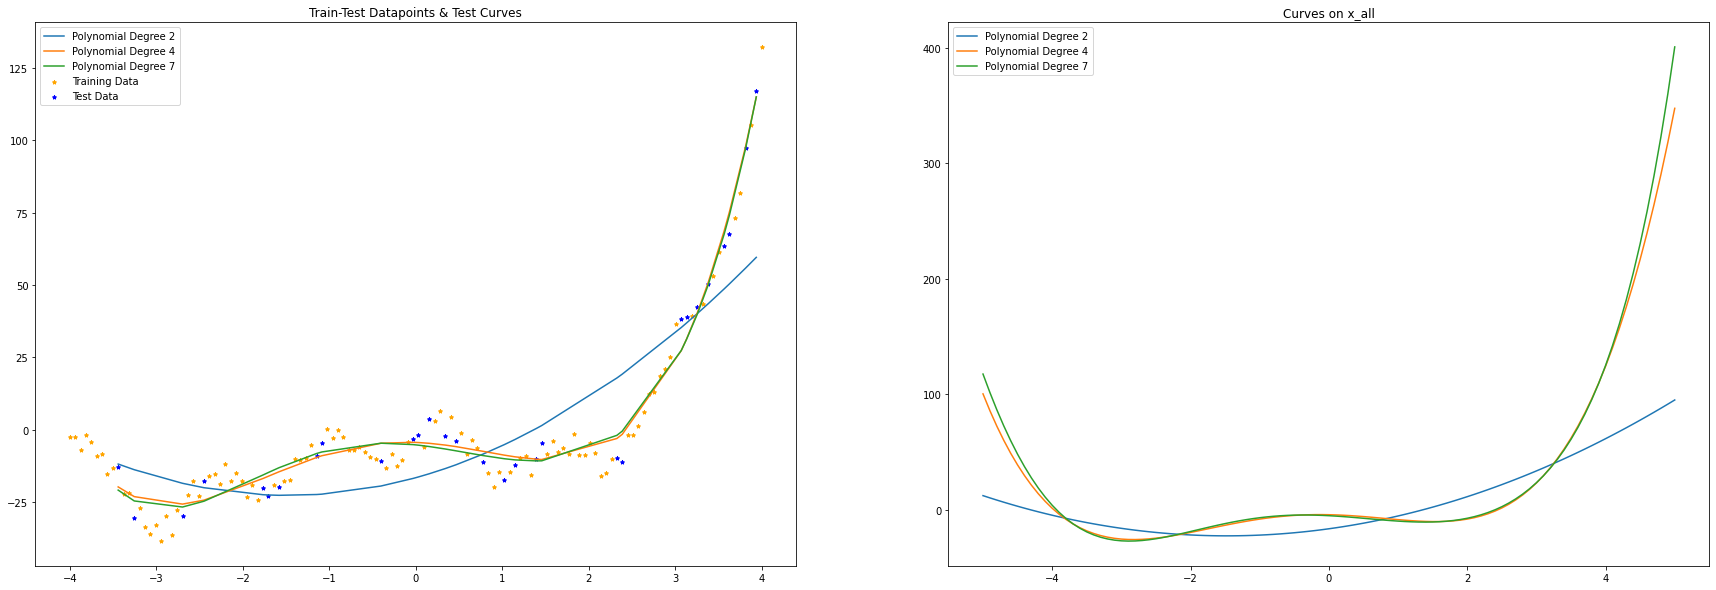

In [4]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

In [5]:
size = [20,40,60,80,100]

train_mse = pd.DataFrame(np.array([np.log(train_rmses_20), np.log(train_rmses_40), np.log(train_rmses_60), np.log(train_rmses_80), np.log(train_rmses_100)]))
train_mse.columns = degree
train_mse.index = size

test_mse = pd.DataFrame(np.array([np.log(test_rmses_20), np.log(test_rmses_40), np.log(test_rmses_60), np.log(test_rmses_80), np.log(test_rmses_100)]))
test_mse.columns = degree
test_mse.index = size

[]

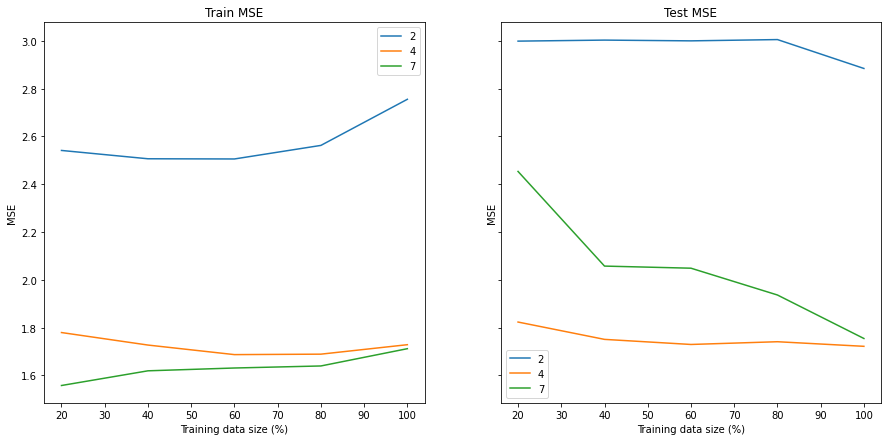

In [6]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
fig.set_size_inches(15, 7,  forward=True)

ax[0].plot(train_mse)
ax[0].legend(train_mse.columns)
ax[0].set_title("Train MSE")
ax[0].set_xlabel("Training data size (%)")
ax[0].set_ylabel("MSE")

ax[1].plot(test_mse)
ax[1].legend(test_mse.columns)
ax[1].set_title("Test MSE")
ax[1].set_xlabel("Training data size (%)")
ax[1].set_ylabel("MSE")

plt.plot()

***

# Question 3: Gradient descent (5 pts)

## Part - a (**2 pts**) 

### **Question**

Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

### **Answer**

Gradient and Stochastic Gradient Descent are ways of optimizing model parameters in an iterative manner in order to minimize the error functions.
While Gradient Descent re-adjusts the optimal weights by calculating the local minima over the entire set of training data, Stocastic Gradient Descent keeps makes minor updates to the weights on each training data, one at a time.

#### **Gradient descent:**

##### Pros:

*   It takes less noisy steps towards the minima of the loss function because it takes the average of all the training sample rather than a single sample
*   It produces more stable gradient descent convergence and stable error gradient than the SDG

##### Cons:

*   Gradient Descent can take too long to process all the training samples as a batch, if the number of parameters are too large.
*   Could approach at a local minima instead of the global minima of the cost function
*   Model has to be retrained and re-deployed periodically should trends change and our training dataset becomes obsolete

#### **Stochastic Gradient Descent:**

##### Pros:

*   Due to the frequent updates that it takes to reach the minima, the loss function has oscillations which can help it get out of the local minima 
*   For large dataset, it can converge faster as it updates the parameters more frequently
*   Ideal for on-line or real-time learning.
*   Model can adapt to changing trends over time without having to be re-trained and deployed

##### Cons:

*   Noisy steps can take longer to converge onto the minima of the loss function


## Part - b (**3 pts**) 

### **Question**

Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: 

**How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

### **Answer**

**Nelder Mead Method:** optimizes a given cost function by finding it's local minima. If we assume a fixed step size, then the algorhithm won't be able to converge optimally and would spend a lot of time inching towards the minima, should the learning rate be too small.

To overcome this shortfall, Nelder-Mead method dynamically alters the step size based on the new point. If the new point has a lower cost than the previous one, learning rate/ step size increases/expands; and if the new point has a higher cost, the learning rate decreases/contracts.

While this method performs very effectively in lower dimensions, the method struggles with finding the optimal direction of the step size in higher dimensions (>12). This really hampers its real-world implementation since most of the datasets have very high dimensions

***

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$

## Answer:

The update rule in SGD for the weights can be written as follows:

$$ w^{​​​​\tau+1}​​​​ = w^\tau - \eta \nabla E$$

where $\tau$ is the iteration of updating the weights, $\eta$ is the learning rate, and $\nabla E$ is the cost function gradient.

The cost for an iteration n is given as $E_n = \frac{​​​​1}​​​​{​​​​2}​​​​ (t - y)^2$, where t is the predicted value and y is the actual value.

$$ \nabla E = \frac{1}{​2} \frac{\partial (t-y)^2}{​​​​\partial w}$$
$$ \nabla E = \frac{1}{​2} \frac{\partial (t-y)^2}{\partial y} *\frac{\partial y}{\partial w} $$
$$ \nabla E = -(t-y) * \frac{​​​​\partial y}{​​​​\partial w}​​​​ $$

Using this equation of $ \nabla E $ in (1), we get: 
$$ w^{​​​​\tau+1}​​​​ = w^\tau + \eta (t-y) * \frac{​​​​\partial y}{\partial w}​​​​ $$

**Updating weights:**

New $ w_0 = w_0 + \eta (t-y) * \frac{​​​​\partial{y}}{​​​​\partial{w_0}}​​​​ $ </br>
**New $ w_0 = w_0 + \eta (t-y) $**

New $ w_1 = w_1 + \eta (t-y) *\frac{​​​​\partial{y}}{​​​​\partial{w_1}}​​​​ $ </br>
**New $ w_1 = w_1 + \eta (t-y) * x_1$**

New $ w_2 = w_2 + \eta (t-y) *\frac{​​​​\partial{y}}{​​​​\partial{w_2}}​​​​ $ </br>
**New $ w_2 = w_2 + \eta (t-y) * x_1x_2$**

New $ w_3 = w_3 + \eta (t-y) *\frac{​​​​\partial{y}}{​​​​\partial{w_3}}​​​​ $ </br>
**New $ w_3 = w_3 + \eta (t-y) * e^{​​​​-x_1}​​​​$**

***


# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [7]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        self.N = 0
        
    def sgd(self, gradient):
        # please put your codes here to update the self.coef using SGD
        self.coef -= gradient*(self.learning_rate)#*(1/self.N))
        # regularizing all except the w0 term
        self.coef[1:] -= (self.regularization*self.coef[1:])*(self.learning_rate)#*(1/self.N))
    
    def fit(self, X, y, update_rule='bgd', plot=False):
        self.N = X.shape[0]
        mse = []
        coefs = []
        X = self.get_features(X)
        
        for epoch in range(self.n_epoch):
            if update_rule == "bgd":
                gradient = np.dot(X.T,(self.linearPredict(X) - y))
                self.sgd(gradient)
            
            elif update_rule == "sgd":
                gradient = np.array([0.0]*self.coef.shape[0])
                for i in range(X.shape[0]):
                # Compute error
                   #please put your codes here
                   hypothesis = self.linearPredict(X[i]) # Predicted Y
                   error = hypothesis - y[i]
                # Compute gradients
                    #please put your codes here
                   gradient = error*X[i]   
                # Update weights
                   self.sgd(gradient)

            coefs.append(self.coef.copy())
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return np.dot(X, self.coef)

In [8]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [9]:
mse = pd.DataFrame(columns=learning_rate, index=regularization)
for alpha in learning_rate:
    for lamda in regularization:
        mdl = Regression(learning_rate = alpha, regularization= lamda, n_epoch= n_epochs)
        mdl.fit(X,y, update_rule="sgd", plot= False)
        mse[alpha][lamda] = mdl.lowest_mse
mse

/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_43154/2036988196.py:21: RuntimeWarning: overflow encountered in multiply
  self.coef[1:] -= (self.regularization*self.coef[1:])*(self.learning_rate)#*(1/self.N))
/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_43154/2036988196.py:19: RuntimeWarning: invalid value encountered in subtract
  self.coef -= gradient*(self.learning_rate)#*(1/self.N))
/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_43154/2036988196.py:21: RuntimeWarning: invalid value encountered in subtract
  self.coef[1:] -= (self.regularization*self.coef[1:])*(self.learning_rate)#*(1/self.N))
/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_43154/2036988196.py:49: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_43154/2036988196.py:21: RuntimeWarning: invalid value encountered in multiply
  self.coef[1:] -= (self.regularization*self.coef[1:])*

,0.0001,0.0010,0.0100,0.1000,1.0000,10.0000,100.0000
0,0.036821,0.030496,0.027391,0.030988,inf,NaN,NaN
10,0.040382,0.033707,0.033821,0.034648,NaN,NaN,NaN
100,0.040672,0.033795,0.033805,NaN,NaN,NaN,NaN


MSE for SGD with Leaning Rate 0.01 and Regularisation Coefficient 0: 0.0274


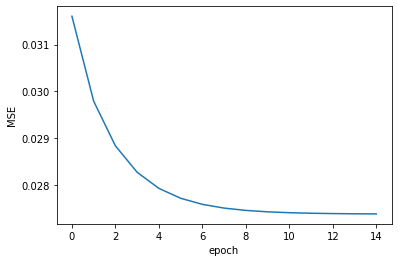

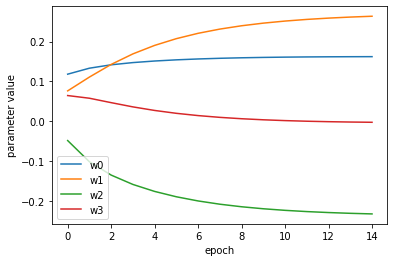

In [10]:
# Minimum MSE
alpha = 0.01
lamda = 0
mdl = Regression(learning_rate = alpha, regularization= lamda, n_epoch= n_epochs)
mdl.fit(X,y, update_rule="sgd", plot= True)
print("MSE for SGD with Leaning Rate {alpha} and Regularisation Coefficient {lamda}: {mse}".format(alpha = alpha, lamda = lamda, mse = round(mdl.lowest_mse, 4)))


MSE for SGD with Leaning Rate 0.001 and Regularisation Coefficient 0: 0.0305


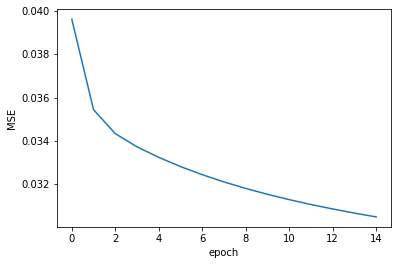

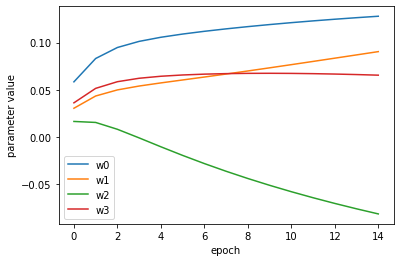

In [11]:
# Second Minimum
alpha = 0.001
lamda = 0
mdl = Regression(learning_rate = alpha, regularization= lamda, n_epoch= n_epochs)
mdl.fit(X,y, update_rule="sgd", plot= True)
print("MSE for SGD with Leaning Rate {alpha} and Regularisation Coefficient {lamda}: {mse}".format(alpha = alpha, lamda = lamda, mse = round(mdl.lowest_mse, 4)))


## Answer 5 - b

- **Minimum**
  - Leaning Rate: 0.01
  - Regularisation Coefficient: 0
  - MSE: 0.0274

- **Second Smallest**
  - Leaning Rate: 0.001
  - Regularisation Coefficient: 0
  - MSE: 0.0305


***
***